In [156]:
import pandas as pd# It is used for data manipulation for data cleaning purposes,even it is helpful to treat missing values
import seaborn as sns# visualisation library based on matplotlib
from scipy.stats import skew 
from scipy.stats import kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import numpy as np
# Load the Titanic dataset
titanic_data = sns.load_dataset("titanic")
# Display the first few rows of the dataset
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [157]:
titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [158]:
categorical_col = [] #Initializes an empty list to store the names of columns that are identified as categorical.
for column in titanic_data.columns: #Iterates through each column in the DataFrame.
    if len(titanic_data[column].unique()) <= 30:#Checks if the column's data type is 'category' (typically indicating a categorical variable) and if the number of unique values in that column is 30 or less.
        categorical_col.append(column) # If the conditions in the if statement are met, it appends the column name to the categorical_col list.
        print(f"{column} : {titanic_data[column].unique()}") #Prints the name of the column and its unique values.
        print(f"{column} : {titanic_data[column].value_counts()}")
        print("====================================") # Prints a separator line for clarity.
        
#The purpose of this code is to help you identify and inspect categorical columns in your DataFrame, particularly those with a manageable number of unique categories. This information is useful for data exploration and analysis, especially when you need to decide how to handle categorical variables in machine learning or data analysis tasks.

survived : [0 1]
survived : survived
0    549
1    342
Name: count, dtype: int64
pclass : [3 1 2]
pclass : pclass
3    491
1    216
2    184
Name: count, dtype: int64
sex : ['male' 'female']
sex : sex
male      577
female    314
Name: count, dtype: int64
sibsp : [1 0 3 4 2 5 8]
sibsp : sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
parch : [0 1 2 5 3 4 6]
parch : parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
embarked : ['S' 'C' 'Q' nan]
embarked : embarked
S    644
C    168
Q     77
Name: count, dtype: int64
class : ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
class : class
Third     491
First     216
Second    184
Name: count, dtype: int64
who : ['man' 'woman' 'child']
who : who
man      537
woman    271
child     83
Name: count, dtype: int64
adult_male : [ True False]
adult_male : adult_male
True     537
False    354
Name: count, dtype: int64
deck : [N

In [159]:
titanic_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [160]:
titanic_data.sex.value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [161]:
titanic_data.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [162]:
titanic_data.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [163]:
titanic_data.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [164]:
titanic_data.alive.value_counts()

alive
no     549
yes    342
Name: count, dtype: int64

In [165]:
titanic_data.adult_male.value_counts()

adult_male
True     537
False    354
Name: count, dtype: int64

In [166]:
titanic_data.deck.value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [167]:
titanic_data.alone.value_counts()

alone
True     537
False    354
Name: count, dtype: int64

In [168]:
titanic_data["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [169]:
titanic_data.shape

(891, 15)

In [170]:
skew(titanic_data["fare"])

4.7792532923723545

In [171]:
skew(titanic_data["survived"])

0.4777174662568536

In [172]:
skew(titanic_data["pclass"])

-0.6294858816096934

In [173]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [174]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [175]:
deck_survival=titanic_data.groupby("deck")["survived"].mean().reset_index()

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_5321/1809904519.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deck_survival=titanic_data.groupby("deck")["survived"].mean().reset_index()


In [176]:
deck_survival

,deck,survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='deck', ylabel='survived'>

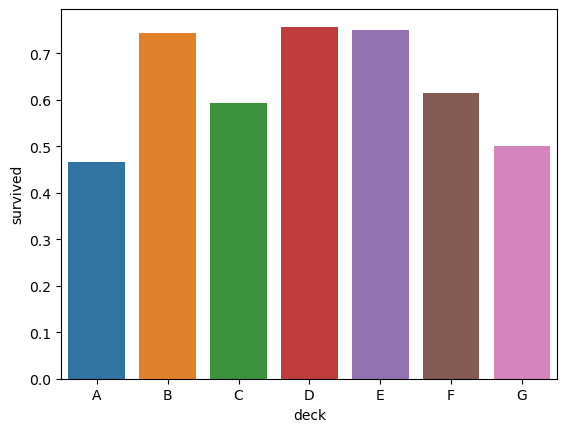

In [177]:
sns.barplot(data=deck_survival,x="deck",y="survived")#survival rate

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Axes: xlabel='sibsp', ylabel='age'>

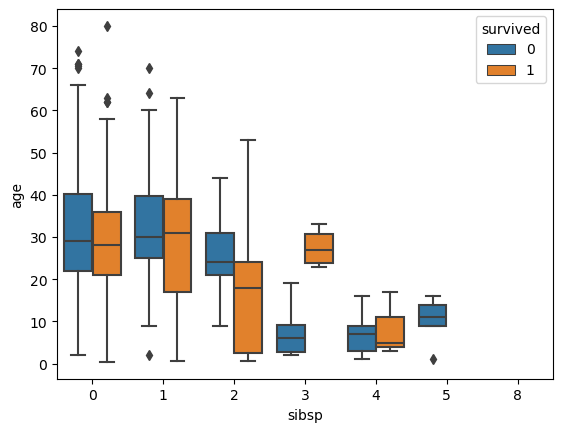

In [178]:
#to find out the missing values of age
sns.boxplot(x='sibsp', y='age',data=titanic_data,hue="survived")#so sibsp is impacted by age column hence we can use parch

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Axes: xlabel='parch', ylabel='age'>

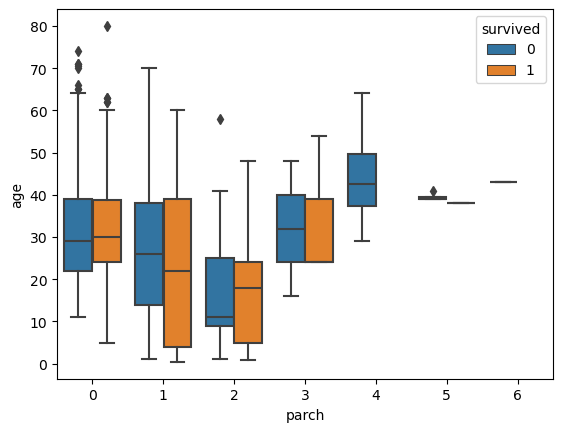

In [179]:
#to find out the missing values of age
sns.boxplot(x='parch', y='age',data=titanic_data,hue="survived")#so parch is impacted by age column hence we can use parch to replace missing values of age

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='parch', ylabel='age'>

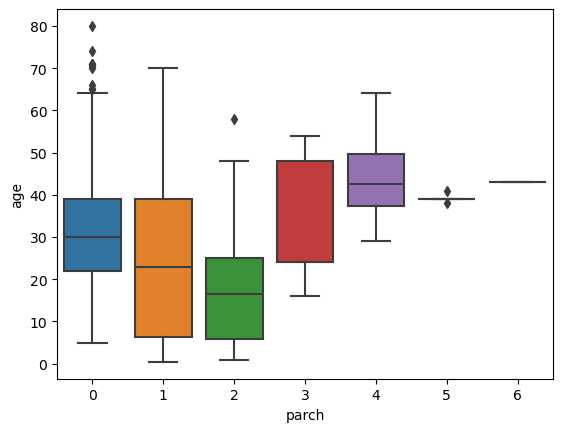

In [180]:
#to find out the missing values of age
sns.boxplot(x='parch', y='age',data=titanic_data)#so parch is impacted by age column hence we can use parch to replace missing values of age

In [181]:
titanic_data.groupby('parch')['age'].median()#median value of parch where the missing values of age 

parch
0    30.0
1    23.0
2    16.5
3    24.0
4    42.5
5    39.0
6    43.0
Name: age, dtype: float64

In [182]:
def age1(col):
    Age=col[0]
    Parch=col[1]
    if pd.isnull(Age):
        if Parch == 0:
            return 30
        elif Parch==1:
            return 23
        elif Parch==2:
            return 16
        elif Parch==3:
            return 24
        elif Parch==4:
            return 42
        elif Parch==5:
            return 39
        else:
            return 43
    else:
        return Age

In [183]:
titanic_data['age']=titanic_data[['age', 'parch']].apply(age1, axis=1)

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_5321/3095843966.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=col[0]
/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_5321/3095843966.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Parch=col[1]


In [184]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [185]:
titanic_data.shape

(891, 15)

In [186]:
#to treat the missing values of deck column.We have 688 missing values for deck hence computing missing values with mode will make the data set biased and skewed & will lead to incorrect predictions while building the model 
#So we will tag the misssing values of deck column as a seperate segment known as "others"
titanic_data["deck"]=titanic_data["deck"].cat.add_categories("other").fillna("other") 

In [187]:
titanic_data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [188]:
#computing the missing values of embarked column with its mode
titanic_data["embarked"]=titanic_data["embarked"].fillna("S")

In [189]:
titanic_data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [190]:
titanic_data.parch.value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [191]:
titanic_data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [192]:
titanic_data["survived"].value_counts()#checking dataset is balanced or not.Here the data set is not balanced and we have to balance it with the help of SMOTE.

survived
0    549
1    342
Name: count, dtype: int64

In [193]:
skew(titanic_data["age"])

0.4500727184947494

In [194]:
skew(titanic_data["sibsp"])

3.6891276847759507

In [195]:
skew(titanic_data["parch"])

2.7444867379203735

In [196]:
kurtosis(titanic_data["survived"])

-1.7717860224331319

In [197]:
kurtosis(titanic_data["fare"])

33.20428925264474

In [198]:
kurtosis(titanic_data["pclass"])

-1.2795696818700388

In [199]:
kurtosis(titanic_data["age"])

0.863043344665706

In [200]:
kurtosis(titanic_data["sibsp"])

17.77351174692092

In [201]:
kurtosis(titanic_data["parch"])

9.716613236667277

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

<Axes: >

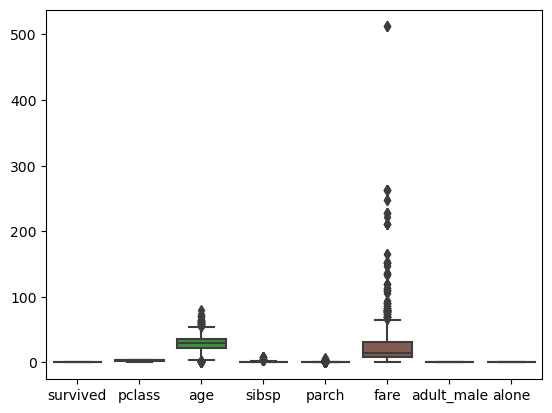

In [202]:
sns.boxplot(titanic_data)

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_5321/2221036958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data["survived"])#survived is discrete variable so this dist plot is not appropriate
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

<Axes: xlabel='survived', ylabel='Density'>

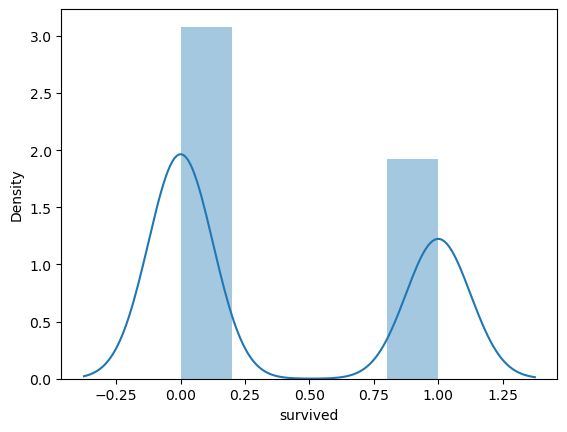

In [203]:
sns.distplot(titanic_data["survived"])#survived is discrete variable so this dist plot is not appropriate

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_5321/1427637919.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data["fare"])
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf v

<Axes: xlabel='fare', ylabel='Density'>

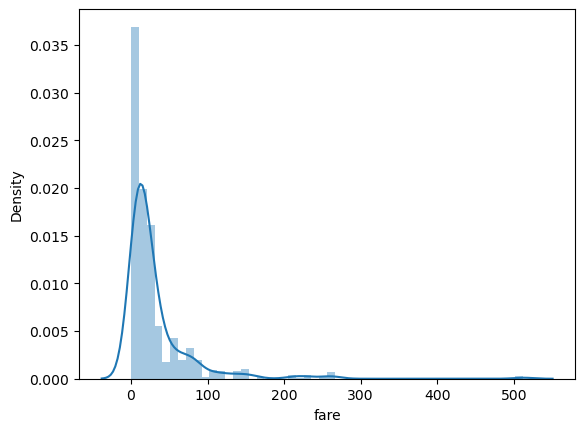

In [204]:
sns.distplot(titanic_data["fare"])

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_5321/1734181900.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data["pclass"])#pclass is discrete variable so this dist plot is not appropriate
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Axes: xlabel='pclass', ylabel='Density'>

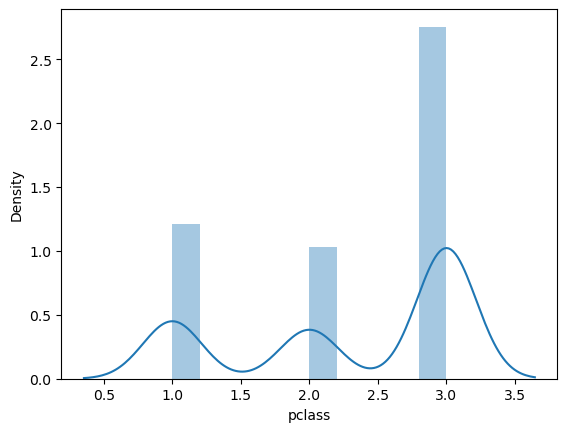

In [205]:
sns.distplot(titanic_data["pclass"])#pclass is discrete variable so this dist plot is not appropriate

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_5321/1387134588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data["age"])
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

<Axes: xlabel='age', ylabel='Density'>

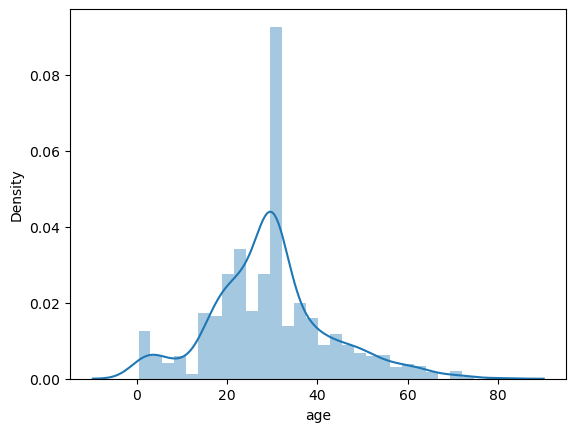

In [206]:
sns.distplot(titanic_data["age"])

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_5321/4051946788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data["sibsp"])#sibsp is discrete variable so this dist plot is not appropriate
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

<Axes: xlabel='sibsp', ylabel='Density'>

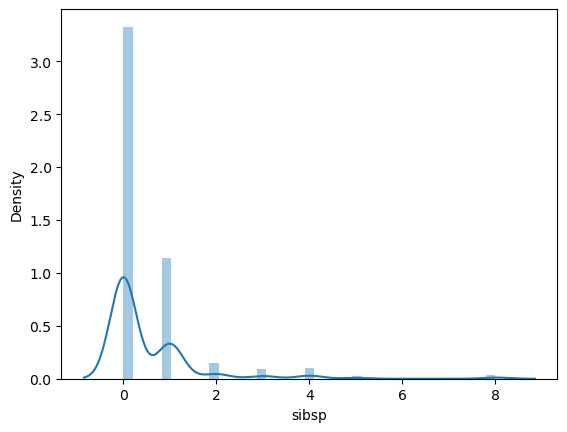

In [207]:
sns.distplot(titanic_data["sibsp"])#sibsp is discrete variable so this dist plot is not appropriate

/var/folders/x_/bydwqxmj22b17_nc_zdgjlhc0000gn/T/ipykernel_5321/513920398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data["parch"])#parch is discrete variable so this dist plot is not appropriate
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is d

<Axes: xlabel='parch', ylabel='Density'>

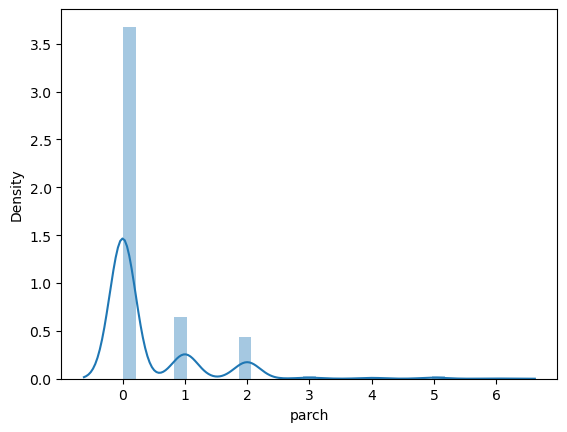

In [208]:
sns.distplot(titanic_data["parch"])#parch is discrete variable so this dist plot is not appropriate

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age', ylabel='fare'>

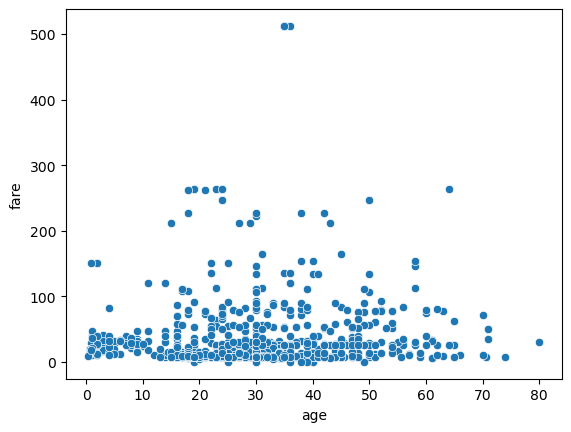

In [209]:
sns.scatterplot(y='fare',x='age',data=titanic_data)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='fare', ylabel='pclass'>

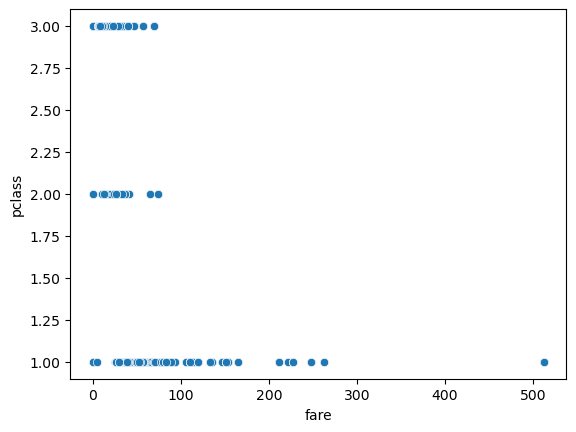

In [210]:
sns.scatterplot(y='pclass',x='fare',data=titanic_data)#one continuous variable and one discrete variable so box plot or bar plot should be appropriate instead of scatter plot which is for 2 continuous variables

In [211]:
#delete class,fare,embark_town,who,adult_male,alive,alone
titanic_data.drop(["class","fare","embark_town","who","adult_male","alive","alone"],axis=1,inplace=True)

In [212]:
titanic_data.head()#columns to be encoded-sex,embarked and deck
#sex-label encoding
#embarked- label encoding / one hot encoding
#deck-one hot encoding

,survived,pclass,sex,age,sibsp,parch,embarked,deck
0,0,3,male,22.0,1,0,S,other
1,1,1,female,38.0,1,0,C,C
2,1,3,female,26.0,0,0,S,other
3,1,1,female,35.0,1,0,S,C
4,0,3,male,35.0,0,0,S,other


In [213]:
titanic_data.deck.value_counts()

deck
other    688
C         59
B         47
D         33
E         32
A         15
F         13
G          4
Name: count, dtype: int64

In [214]:
#applying label encoding to sex column
le=LabelEncoder()#saving the instance
gender=titanic_data['sex']
gender1=le.fit_transform(gender)
gender1

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [215]:
#changing from an array to data frame
gender_df=pd.DataFrame(gender1,columns=['gender'])
gender_df

,gender
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [216]:
#applying one hot encoding to embarked column
binary=OneHotEncoder(categories='auto')#it creates an instance of the one hot encoder class with the categories parameter set to Auto which means it will automatically determine the categories of the data

In [217]:
embarked=titanic_data['embarked']
embarked1=le.fit_transform(embarked)
e1=binary.fit_transform(embarked1.reshape(-1, 1))
e2=e1.toarray()
embarked_df=pd.DataFrame(e2,columns=['c','q','s'])
embarked_df

,c,q,s
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [218]:
#applying one hot encoding to deck column
binary1=OneHotEncoder(categories='auto')#it creates an instance of the one hot encoder class with the categories parameter set to Auto which means it will automatically determine the categories of the data

In [219]:
deck=titanic_data['deck']
deck1=le.fit_transform(deck)
d1=binary1.fit_transform(deck1.reshape(-1, 1))
d2=d1.toarray()
deck_df=pd.DataFrame(d2,columns=['a','b','c','d','e','f','g','other'])
deck_df

,a,b,c,d,e,f,g,other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [220]:
#we need to concatenate gender_df,embarked_df,deck_df to our original data
data_updated=pd.concat([titanic_data,gender_df,embarked_df,deck_df],axis=1)
data_updated

,survived,pclass,sex,age,sibsp,parch,embarked,deck,gender,c,q,s,a,b,c,d,e,f,g,other
0,0,3,male,22.0,1,0,S,other,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,C,C,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,S,other,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,S,C,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,3,male,35.0,0,0,S,other,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S,other,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,1,female,19.0,0,0,S,B,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0,3,female,16.0,1,2,S,other,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1,male,26.0,0,0,C,C,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [221]:
#dropping unecessary columns-sex,embarked,deck,c(embarked),c(deck)
data_updated.drop(["sex","embarked","deck","c","c"],axis=1,inplace=True)
data_updated

,survived,pclass,age,sibsp,parch,gender,q,s,a,b,d,e,f,g,other
0,0,3,22.0,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,26.0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,35.0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,1,1,19.0,0,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,0,3,16.0,1,2,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1,26.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
data_updated.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
gender      0
q           0
s           0
a           0
b           0
d           0
e           0
f           0
g           0
other       0
dtype: int64

In [223]:
#dividing the data set into x and y.
x=data_updated.drop('survived',axis=1)
y=data_updated['survived']

In [224]:
#applying feature scaling on x(features)
x=(x-np.min(x))/(np.max(x)-np.min(x))
#scaled_value = (value - min_value) / (max_value - min_value) which is min-max scaler feature selection
x
#this method of doing min-max scaling is inappropriate because it is unable to retain the hierrarchical values for the categorical variables having either 0 or 1 as possible values

,pclass,age,sibsp,parch,gender,q,s,a,b,d,e,f,g,other
0,0.0375,0.2750,0.0125,0.000,0.0125,0.0000,0.0125,0.0,0.0000,0.0,0.0,0.0,0.0,0.0125
1,0.0125,0.4750,0.0125,0.000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000
2,0.0375,0.3250,0.0000,0.000,0.0000,0.0000,0.0125,0.0,0.0000,0.0,0.0,0.0,0.0,0.0125
3,0.0125,0.4375,0.0125,0.000,0.0000,0.0000,0.0125,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000
4,0.0375,0.4375,0.0000,0.000,0.0125,0.0000,0.0125,0.0,0.0000,0.0,0.0,0.0,0.0,0.0125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0250,0.3375,0.0000,0.000,0.0125,0.0000,0.0125,0.0,0.0000,0.0,0.0,0.0,0.0,0.0125
887,0.0125,0.2375,0.0000,0.000,0.0000,0.0000,0.0125,0.0,0.0125,0.0,0.0,0.0,0.0,0.0000
888,0.0375,0.2000,0.0125,0.025,0.0000,0.0000,0.0125,0.0,0.0000,0.0,0.0,0.0,0.0,0.0125
889,0.0125,0.3250,0.0000,0.000,0.0125,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0000


In [225]:
scaler=MinMaxScaler()#saving the instance
scaled_data=scaler.fit_transform(x)
scaled_data=pd.DataFrame(scaled_data,columns=x.columns)
scaled_data

,pclass,age,sibsp,parch,gender,q,s,a,b,d,e,f,g,other
0,1.0,0.271174,0.125,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.472229,0.125,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.321438,0.000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.434531,0.125,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.434531,0.000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.0,0.233476,0.000,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,1.0,0.195778,0.125,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.0,0.321438,0.000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
scaled_data.shape

(891, 14)

In [227]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2,random_state=6)

In [228]:
x_train,x_test,y_train,y_test

(     pclass       age  sibsp     parch  gender    q    s    a    b    d    e  \
 741     0.0  0.447097  0.125  0.000000     1.0  0.0  1.0  0.0  0.0  0.0  0.0   
 577     0.0  0.484795  0.125  0.000000     0.0  0.0  1.0  0.0  0.0  0.0  1.0   
 810     1.0  0.321438  0.000  0.000000     1.0  0.0  1.0  0.0  0.0  0.0  0.0   
 299     0.0  0.623021  0.000  0.166667     0.0  0.0  0.0  0.0  1.0  0.0  0.0   
 655     0.5  0.296306  0.250  0.000000     1.0  0.0  1.0  0.0  0.0  0.0  0.0   
 ..      ...       ...    ...       ...     ...  ...  ...  ...  ...  ...  ...   
 335     1.0  0.371701  0.000  0.000000     1.0  0.0  1.0  0.0  0.0  0.0  0.0   
 365     1.0  0.371701  0.000  0.000000     1.0  0.0  1.0  0.0  0.0  0.0  0.0   
 618     0.5  0.044986  0.250  0.166667     0.0  0.0  1.0  0.0  0.0  0.0  0.0   
 227     1.0  0.252325  0.000  0.000000     1.0  0.0  1.0  0.0  0.0  0.0  0.0   
 713     1.0  0.359135  0.000  0.000000     1.0  0.0  1.0  0.0  0.0  0.0  0.0   
 
        f    g  other  
 7

In [229]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('Naive bayes', GaussianNB()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma='auto', random_state = 42)))
models.append(('XGBoost', XGBClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [230]:
for name, model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.8491620111731844
Naive bayes : 0.6983240223463687
CART : 0.8156424581005587
Random Forest : 0.8324022346368715
SVM : 0.8212290502793296


/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futur

XGBoost : 0.8491620111731844
GradientBoosting : 0.8603351955307262


In [231]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [232]:
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1])

In [233]:
#finding the evaluation metrics
accuracy_dt=accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.8212290502793296

In [234]:
train_score_dt=dt.score(x_train,y_train)
train_score_dt

0.9466292134831461

In [235]:
test_score_dt=dt.score(x_test,y_test)
test_score_dt

0.8212290502793296

In [236]:
#applying decision tree with hyper parameter tuning
dt_classifier = DecisionTreeClassifier()

In [237]:
param_grid = {
    'max_depth': [None, 5, 10, 15],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    'splitter': ['best', 'random'],            # Strategy to choose the split at each node
    'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [238]:
grid_search = GridSearchCV(dt_classifier, param_grid, cv=8, scoring='accuracy')

In [239]:
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [240]:
best_params = grid_search.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'splitter': 'best'}

In [241]:
#we are creating a new decision tree classifier with the best hyper parameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, min_samples_leaf=2,
                       min_samples_split=5)

In [242]:
y_pred_tune=best_dt_classifier.predict(x_test)
y_pred_tune

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1])

In [243]:
accuracy_decision_tune= accuracy_score(y_test, y_pred_tune)
accuracy_decision_tune

0.8379888268156425

In [244]:
test_score_decision_tune=best_dt_classifier.score(x_test,y_test)
test_score_decision_tune

0.8379888268156425

In [245]:
train_score_decision_tune=best_dt_classifier.score(x_train,y_train)
train_score_decision_tune

0.8651685393258427

In [246]:
#applying decision tree with hyper parameter tuning
dt_classifier1 = DecisionTreeClassifier()

In [247]:
param_grid1 = {
    'max_depth': [2,3],            # Maximum depth of the tree
    'max_leaf_nodes': [4,6]       # Maximum number of leaf nodes in the tree
}

In [248]:
grid_search1 = GridSearchCV(dt_classifier1, param_grid1, cv=3, scoring='accuracy')

In [249]:
grid_search1.fit(x_train, y_train) 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3], 'max_leaf_nodes': [4, 6]},
             scoring='accuracy')

In [250]:
best_params = grid_search1.best_params_
best_params

{'max_depth': 3, 'max_leaf_nodes': 6}

In [251]:
#we are creating a new decision tree classifier with the best hyper parameters
best_dt_classifier1 = DecisionTreeClassifier(**best_params)
best_dt_classifier1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6)

In [252]:
y_pred_tune=best_dt_classifier1.predict(x_test)
y_pred_tune

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

In [253]:
accuracy_decision_tune1= accuracy_score(y_test, y_pred_tune)
accuracy_decision_tune1

0.8156424581005587

In [254]:
test_score_decision_tune1=best_dt_classifier1.score(x_test,y_test)
test_score_decision_tune1

0.8156424581005587

In [255]:
train_score_decision_tune1=best_dt_classifier1.score(x_train,y_train)
train_score_decision_tune1

0.7907303370786517

In [256]:
lr=LogisticRegression(solver='liblinear')#solver='liblinear' is used for algorithm optimization, however it is optional
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [257]:
y_pred=lr.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1])

In [258]:
y_pred.shape

(179,)

In [259]:
#finding the evaluation metrics
accuracy_logistic=accuracy_score(y_test,y_pred)
accuracy_logistic

0.8491620111731844

In [260]:
train_score=lr.score(x_train,y_train)
train_score

0.797752808988764

In [261]:
test_score=lr.score(x_test,y_test)
test_score

0.8491620111731844

In [262]:
precision_logistic=precision_score(y_test,y_pred)
precision_logistic

0.8305084745762712

In [263]:
recall_logistic=recall_score(y_test,y_pred)
recall_logistic

0.7424242424242424

In [264]:
confusion_matrix_logistic=confusion_matrix(y_test,y_pred)
confusion_matrix_logistic

array([[103,  10],
       [ 17,  49]])

In [265]:
classification_report_logistic=classification_report(y_test,y_pred)
print(classification_report_logistic)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       113
           1       0.83      0.74      0.78        66

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



In [266]:
#TN=95,95 people in the titanic ship has died(considering negative cases as not survived) and model has identified that correctly
#FP=15,15 people have survived but model has  identified incorrectly, positive but falsely
#FN=17, 17 people have died but model has identified incorrectly, negative but falsely
#TP=52, 52 people in the titanic ship has survived(considering positive cases as survived) and model has identified that correctly

In [267]:
#applying default random forest
rf=RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [268]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1])

In [269]:
accuracy_rf= accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.8324022346368715

In [270]:
test_score_rf=rf.score(x_test,y_test)
test_score_rf

0.8324022346368715

In [271]:
train_score_rf=rf.score(x_train,y_train)
train_score_rf

0.9466292134831461

In [272]:
rf_tuned=RandomForestClassifier(random_state=6)

In [273]:
param_grid = {
    'max_depth': [2,3,5],            # Maximum depth of the tree
    'min_samples_split': [2, 3, 6],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],   # Number of features to consider at each split
    'criterion': ['gini', 'entropy'],         # Split criterion: Gini impurity or entropy
    'max_leaf_nodes': [None, 10, 20, 30]       # Maximum number of leaf nodes in the tree
}

In [274]:
rf_gridsearch=GridSearchCV(rf_tuned, param_grid,cv=8, scoring='accuracy')
#['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']

In [275]:
rf_gridsearch.fit(x_train, y_train) 

GridSearchCV(cv=8, estimator=RandomForestClassifier(random_state=6),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 6]},
             scoring='accuracy')

In [276]:
best_params_rf = rf_gridsearch.best_params_
best_params_rf

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [277]:
#we are creating a new random classifier with the best hyper parameters
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=6)

In [278]:
y_pred_rf_tune=best_rf_classifier.predict(x_test)
y_pred_rf_tune

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1])

In [279]:
accuracy_rf_tune= accuracy_score(y_test, y_pred_rf_tune)
accuracy_rf_tune

0.8324022346368715

In [280]:
train_score_rf_tune=best_rf_classifier.score(x_train,y_train)
train_score_rf_tune

0.8455056179775281

In [281]:
test_score_rf_tune=best_rf_classifier.score(x_test,y_test)
test_score_rf_tune

0.8324022346368715

In [282]:
#random forest with hyper parameter tuning model gives an accuracy score of 78.68% with a good fit hence finding out the evaluation metrics for this model.
recall_rf = recall_score(y_test, y_pred_rf_tune)*100
recall_rf

65.15151515151516

In [283]:
precision_rf = precision_score(y_test, y_pred_rf_tune)*100
precision_rf

86.0

In [284]:
f1_rf = f1_score(y_test, y_pred_rf_tune)*100
f1_rf

74.13793103448276

In [285]:
confusion_rf = confusion_matrix(y_test, y_pred_rf_tune)
confusion_rf

array([[106,   7],
       [ 23,  43]])

In [286]:
classification_report__random=classification_report(y_test, y_pred_rf_tune)
print(classification_report__random)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       113
           1       0.86      0.65      0.74        66

    accuracy                           0.83       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.84      0.83      0.83       179



for random forest the accuracy:0.8324022346368715,f1-score:74.13793103448276,precision:86.0,recall:65.15151515151516. for 0 the f1-score is  0.88 and for 1 the f1-score is 0.74.

In [287]:
titanic_data.shape

(891, 8)

/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/souravghoshhansda/anaconda3/envs/notebook/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='survived', ylabel='count'>

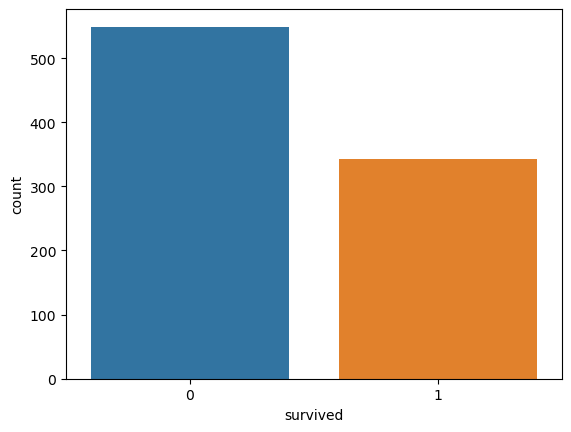

In [288]:
sns.countplot(x='survived',data=titanic_data)

In [289]:
count_survived=len(titanic_data[titanic_data.survived==1])
count_survived

342

In [290]:
count_not_survived=len(titanic_data[titanic_data.survived==0])
count_not_survived

549

In [291]:
#find the percentage of passengers surviving
print("Survived %: {:.2f}%".format((count_survived / (len(titanic_data.survived))*100)))

Survived %: 38.38%


In [292]:
#find the percentage of passengers not surviving
print("Not Survived %: {:.2f}%".format((count_not_survived / (len(titanic_data.survived))*100)))

Not Survived %: 61.62%


In [293]:
female_passengers=len(titanic_data[titanic_data.sex=='female'])
female_passengers

314

In [294]:
male_passengers=len(titanic_data[titanic_data.sex=='male'])
male_passengers

577

In [295]:
#find the percentage of female passengers
print("Female passengers  %: {:.2f}%".format((female_passengers / (len(titanic_data.survived))*100)))

Female passengers  %: 35.24%


In [296]:
#find the percentage of male passengers
print("Male passengers  %: {:.2f}%".format((male_passengers / (len(titanic_data.survived))*100)))

Male passengers  %: 64.76%


In [297]:
# male passengers who survived
male_passengers_survived = len(titanic_data[(titanic_data['sex'] == 'male') & (titanic_data['survived'] == 1)])
male_passengers_survived

109

In [298]:
# female passengers who survived
female_passengers_survived = len(titanic_data[(titanic_data['sex'] == 'female') & (titanic_data['survived'] == 1)])
female_passengers_survived

233

In [299]:
#find the percentage of male passengers who survived
print("Male passengers  %: {:.2f}%".format((male_passengers_survived / male_passengers*100)))

Male passengers  %: 18.89%


In [300]:
#find the percentage of female passengers who survived
print("Female passengers  %: {:.2f}%".format((female_passengers_survived / female_passengers*100)))

Female passengers  %: 74.20%


In [301]:
male_passengers_survived_age_more_50 = len(titanic_data[(titanic_data['sex'] == 'male') & (titanic_data['age'] > 50) & (titanic_data['survived'] == 1)])
male_passengers_survived_age_more_50

6

In [302]:
male_passengers_survived_age_more_50_data = titanic_data[(titanic_data['sex'] == 'male') & (titanic_data['age'] > 50) & (titanic_data['survived'] == 1)]
male_passengers_survived_age_more_50_data

,survived,pclass,sex,age,sibsp,parch,embarked,deck
449,1,1,male,52.0,0,0,S,C
570,1,2,male,62.0,0,0,S,other
587,1,1,male,60.0,1,1,C,B
630,1,1,male,80.0,0,0,S,A
647,1,1,male,56.0,0,0,C,A
857,1,1,male,51.0,0,0,S,E


In [303]:
male_passengers_survived_age_less_50_data = titanic_data[(titanic_data['sex'] == 'male') & (titanic_data['age'] <= 50) & (titanic_data['survived'] == 1)]
male_passengers_survived_age_less_50_data

,survived,pclass,sex,age,sibsp,parch,embarked,deck
17,1,2,male,30.00,0,0,S,other
21,1,2,male,34.00,0,0,S,D
23,1,1,male,28.00,0,0,S,A
36,1,3,male,30.00,0,0,C,other
55,1,1,male,30.00,0,0,S,C
...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,S,other
838,1,3,male,32.00,0,0,S,other
839,1,1,male,30.00,0,0,C,C
869,1,3,male,4.00,1,1,S,other


In [304]:
data1 = titanic_data[(titanic_data['age'] >= 60) & (titanic_data['age'] <= 70) & (titanic_data['survived'] == 1)]
data1

,survived,pclass,sex,age,sibsp,parch,embarked,deck
275,1,1,female,63.0,1,0,S,D
366,1,1,female,60.0,1,0,C,D
483,1,3,female,63.0,0,0,S,other
570,1,2,male,62.0,0,0,S,other
587,1,1,male,60.0,1,1,C,B
829,1,1,female,62.0,0,0,S,B


In [305]:
titanic_data[titanic_data['age'].between(60, 70) & (titanic_data['survived'] == 1)]

,survived,pclass,sex,age,sibsp,parch,embarked,deck
275,1,1,female,63.0,1,0,S,D
366,1,1,female,60.0,1,0,C,D
483,1,3,female,63.0,0,0,S,other
570,1,2,male,62.0,0,0,S,other
587,1,1,male,60.0,1,1,C,B
829,1,1,female,62.0,0,0,S,B


In [306]:
male_passengers_survived_age_less_50 = len(titanic_data[(titanic_data['sex'] == 'male') & (titanic_data['age'] <= 50) & (titanic_data['survived'] == 1)])
male_passengers_survived_age_less_50

103

In [307]:
print("Male passengers survived having age less than 50  %: {:.2f}%".format((male_passengers_survived_age_less_50 / male_passengers*100)))

Male passengers survived having age less than 50  %: 17.85%


In [308]:
print("Male passengers survived having age more than 50  %: {:.2f}%".format((male_passengers_survived_age_more_50 / male_passengers*100)))

Male passengers survived having age more than 50  %: 1.04%


In [309]:
male_passengers_not_survived_age_more_50 = len(titanic_data[(titanic_data['sex'] == 'male') & (titanic_data['age'] > 50) & (titanic_data['survived'] == 0)])
male_passengers_not_survived_age_more_50

41

In [310]:
male_passengers_not_survived_age_less_50 = len(titanic_data[(titanic_data['sex'] == 'male') & (titanic_data['age'] <= 50) & (titanic_data['survived'] == 0)])
male_passengers_not_survived_age_less_50

427

In [311]:
print("Male passengers not survived having age less than 50  %: {:.2f}%".format((male_passengers_not_survived_age_less_50/ male_passengers*100)))

Male passengers not survived having age less than 50  %: 74.00%


In [312]:
print("Male passengers not survived having age more than 50  %: {:.2f}%".format((male_passengers_not_survived_age_more_50/ male_passengers*100)))

Male passengers not survived having age more than 50  %: 7.11%


In [313]:
female_passengers_survived_age_more_50 = len(titanic_data[(titanic_data['sex'] == 'female') & (titanic_data['age'] > 50) & (titanic_data['survived'] == 1)])
female_passengers_survived_age_more_50

16

In [314]:
female_passengers_survived_age_less_50 = len(titanic_data[(titanic_data['sex'] == 'female') & (titanic_data['age'] <= 50) & (titanic_data['survived'] == 1)])
female_passengers_survived_age_less_50

217

In [315]:
print("Female passengers survived having age less than 50  %: {:.2f}%".format((female_passengers_survived_age_less_50 / female_passengers*100)))

Female passengers survived having age less than 50  %: 69.11%


In [316]:
print("Female passengers  survived having age more than 50  %: {:.2f}%".format((female_passengers_survived_age_more_50 / female_passengers*100)))

Female passengers  survived having age more than 50  %: 5.10%


In [317]:
female_passengers_not_survived_age_more_50 = len(titanic_data[(titanic_data['sex'] == 'female') & (titanic_data['age'] > 50) & (titanic_data['survived'] == 0)])
female_passengers_not_survived_age_more_50

1

In [318]:
female_passengers_not_survived_age_less_50 = len(titanic_data[(titanic_data['sex'] == 'female') & (titanic_data['age'] <= 50) & (titanic_data['survived'] == 0)])
female_passengers_not_survived_age_less_50


80

In [319]:
print("Female passengers not survived having age less than 50  %: {:.2f}%".format((female_passengers_not_survived_age_less_50/ female_passengers*100)))

Female passengers not survived having age less than 50  %: 25.48%


In [320]:
print("Female passengers not survived having age more than 50  %: {:.2f}%".format((female_passengers_not_survived_age_more_50/ female_passengers*100)))

Female passengers not survived having age more than 50  %: 0.32%
